In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score


In [133]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [33]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [34]:
# delete rows with missing values of "ph" as it is as essential factor:

df.dropna(subset = ["ph"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
1,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
2,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
3,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
2780,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
2781,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
2782,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
2783,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [35]:
# Replace other missing values by mean

avg_Sulfate = df["Sulfate"].astype("float").mean(axis=0)
df["Sulfate"].replace(np.nan, avg_Sulfate, inplace=True)

avg_Trihalomethanes = df["Trihalomethanes"].astype("float").mean(axis=0)
df["Trihalomethanes"].replace(np.nan, avg_Trihalomethanes, inplace=True)

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,129.422921,18630.057858,6.635246,333.312912,592.885359,15.180013,56.329076,4.500656,0
1,8.099124,224.236259,19909.541732,9.275884,333.312912,418.606213,16.868637,66.420093,3.055934,0
2,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
3,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
2780,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
2781,7.808856,193.553212,17329.802160,8.061362,333.312912,392.449580,19.903225,66.491551,2.798243,1
2782,9.419510,175.762646,33155.578218,7.350233,333.312912,432.044783,11.039070,69.845400,3.298875,1
2783,5.126763,230.603758,11983.869376,6.303357,333.312912,402.883113,11.168946,77.488213,4.708658,1


In [36]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [55]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,7.080795,196.281206,21971.018946,7.126535,333.312912,427.077952,14.308514,66.491551,3.970230,0.395332
std,1.594320,32.940796,8721.738165,1.590114,35.808565,80.962232,3.304141,15.762639,0.784964,0.489010
min,0.000000,47.432000,320.942611,0.530351,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.841063,15661.940335,6.127804,316.778999,367.044379,12.095251,56.839602,3.440859,0.000000
50%,7.036752,197.076934,20868.627979,7.130161,333.312912,423.736784,14.252684,66.491551,3.958543,0.000000
75%,8.062066,216.622392,27317.099444,8.108318,349.655175,482.598270,16.574190,76.992716,4.515150,1.000000
max,14.000000,323.124000,56867.859236,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [56]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.015786,0.018614,0.043503,0.003251,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.045659,-0.024479,-0.092249,-0.016641,0.018870,-0.021239,-0.010512,-0.002595
Solids,-0.089288,-0.045659,1.000000,-0.063770,-0.143881,0.009594,-0.005955,-0.016144,0.021306,0.038847
Chloramines,-0.034350,-0.024479,-0.063770,1.000000,0.002985,-0.015573,-0.020299,0.023133,-0.001134,0.023011
Sulfate,0.015786,-0.092249,-0.143881,0.002985,1.000000,-0.013692,0.024647,-0.019773,-0.003983,-0.016353
Conductivity,0.018614,-0.016641,0.009594,-0.015573,-0.013692,1.000000,0.012024,-0.001035,0.008667,-0.005290
Organic_carbon,0.043503,0.018870,-0.005955,-0.020299,0.024647,0.012024,1.000000,-0.014720,-0.033048,-0.025777
Trihalomethanes,0.003251,-0.021239,-0.016144,0.023133,-0.019773,-0.001035,-0.014720,1.000000,-0.019234,0.012479
Turbidity,-0.039057,-0.010512,0.021306,-0.001134,-0.003983,0.008667,-0.033048,-0.019234,1.000000,0.005025
Potability,-0.003556,-0.002595,0.038847,0.023011,-0.016353,-0.005290,-0.025777,0.012479,0.005025,1.000000


,Solids,Hardness
Solids,1.000000,-0.045659
Hardness,-0.045659,1.000000


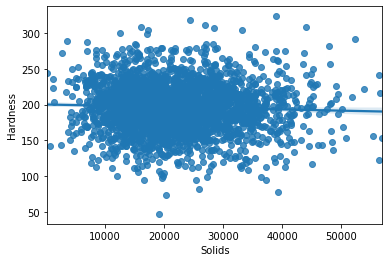

In [57]:
# Solids and Hardness realation:
sns.regplot(x="Solids", y="Hardness", data=df)
df[["Solids", "Hardness"]].corr()


In [59]:
pearson_coef, p_value = stats.pearsonr(df['Solids'], df['Hardness'])
print(pearson_coef, p_value)  

-0.04565894688408917 0.015963930142016355


In [60]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [119]:
from sklearn.tree import DecisionTreeClassifier

max_depth = []
accuracy_gini = []
accuracy_entropy = []

for i in range(1,11):
     clf_dec = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=42)
     clf_dec.fit(X_train, y_train)
     y_pred_dec = clf_dec.predict(X_test)
     accuracy_gini.append(accuracy_score(y_test, y_pred_dec))
    
     clf_dec = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)
     clf_dec.fit(X_train, y_train)
     y_pred_dec = clf_dec.predict(X_test)
     accuracy_entropy.append(accuracy_score(y_test, y_pred_dec))
     
     max_depth.append(i)

   accuracy_gini  accuracy_entropy  max_depth
0       0.610413          0.610413          1
1       0.615799          0.615799          2
2       0.639138          0.639138          3
3       0.671454          0.637343          4
4       0.675045          0.626571          5
5       0.640934          0.621185          6
6       0.655296          0.621185          7
7       0.631957          0.615799          8
8       0.648115          0.621185          9
9       0.615799          0.640934         10


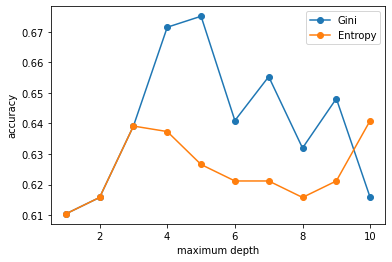

In [120]:
data = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})


plt.plot('max_depth','accuracy_gini', 'o-', data=data, label='Gini')
plt.plot('max_depth','accuracy_entropy', 'o-', data=data, label='Entropy')
plt.xlabel('maximum depth')
plt.ylabel('accuracy')

plt.legend()
print(data)

In [128]:
from sklearn.ensemble import RandomForestClassifier
clf_ran_gini = RandomForestClassifier(n_estimators = 500, criterion = 'gini', random_state = 42)
clf_ran_gini.fit(X_train, y_train)
y_pred_ran_gini = clf_ran_gini.predict(X_test)
accuracy_score(y_test, y_pred_ran_gini)

0.6912028725314183

In [131]:
clf_ran_entropy = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 42)
clf_ran_entropy.fit(X_train, y_train)
y_pred_ran_entropy = clf_ran_entropy.predict(X_test)
accuracy_score(y_test, y_pred_ran_entropy)

0.6822262118491921

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
#logistic Regression

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state = 42)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)
accuracy_score(y_test, y_pred_log)

0.6014362657091562

In [69]:
#Support Vector Machine

from sklearn.svm import SVC
clf_svm = SVC(kernel = 'linear', random_state = 42)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.5978456014362658